In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd

# Define the updated data
data = {
    'Model': ['MNB', 'LSTM', 'BERT', 'RoBERTa'],
    'Accuracy': [0.8443, 0.88, 0.91, 0.90],
    'Precision': [0.68, 0.71, 0.76, 0.74],  # Example macro avg precision
    'Recall': [0.87, 0.88, 0.90, 0.91],  # Example macro avg recall
    'F1-Score': [0.72, 0.76, 0.81, 0.79],  # Example macro avg F1-Score
    'AUC-ROC': [0.946, 0.9513, 0.9686, 0.9708]  # AUC-ROC available for LSTM, BERT, and RoBERTa
}

# Create a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame to verify
print(df)


     Model  Accuracy  Precision  Recall  F1-Score  AUC-ROC
0      MNB    0.8443       0.68    0.87      0.72   0.9460
1     LSTM    0.8800       0.71    0.88      0.76   0.9513
2     BERT    0.9100       0.76    0.90      0.81   0.9686
3  RoBERTa    0.9000       0.74    0.91      0.79   0.9708


In [2]:
import plotly.graph_objects as go
import pandas as pd

# Define the updated data
data = {
    'Model': ['MNB', 'LSTM', 'BERT', 'RoBERTa'],
    'Accuracy': [0.8443, 0.88, 0.91, 0.90],
    'Precision': [0.68, 0.71, 0.76, 0.74],
    'Recall': [0.87, 0.88, 0.90, 0.91],
    'F1-Score': [0.72, 0.76, 0.81, 0.79],
    'AUC-ROC': [0.946, 0.9513, 0.9686, 0.9708]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Radar chart setup
fig = go.Figure()

# Add radar chart for each model
for model in df['Model']:
    fig.add_trace(go.Scatterpolar(
        r=df[df['Model'] == model].iloc[0, 1:].values,
        theta=df.columns[1:],
        fill='toself',
        name=model
    ))

# Update layout
fig.update_layout(
    polar=dict(
        radialaxis=dict(visible=True, range=[0, 1])
    ),
    showlegend=True,
    title='Model Performance Radar Chart'
)

# Show the plot
fig.show()


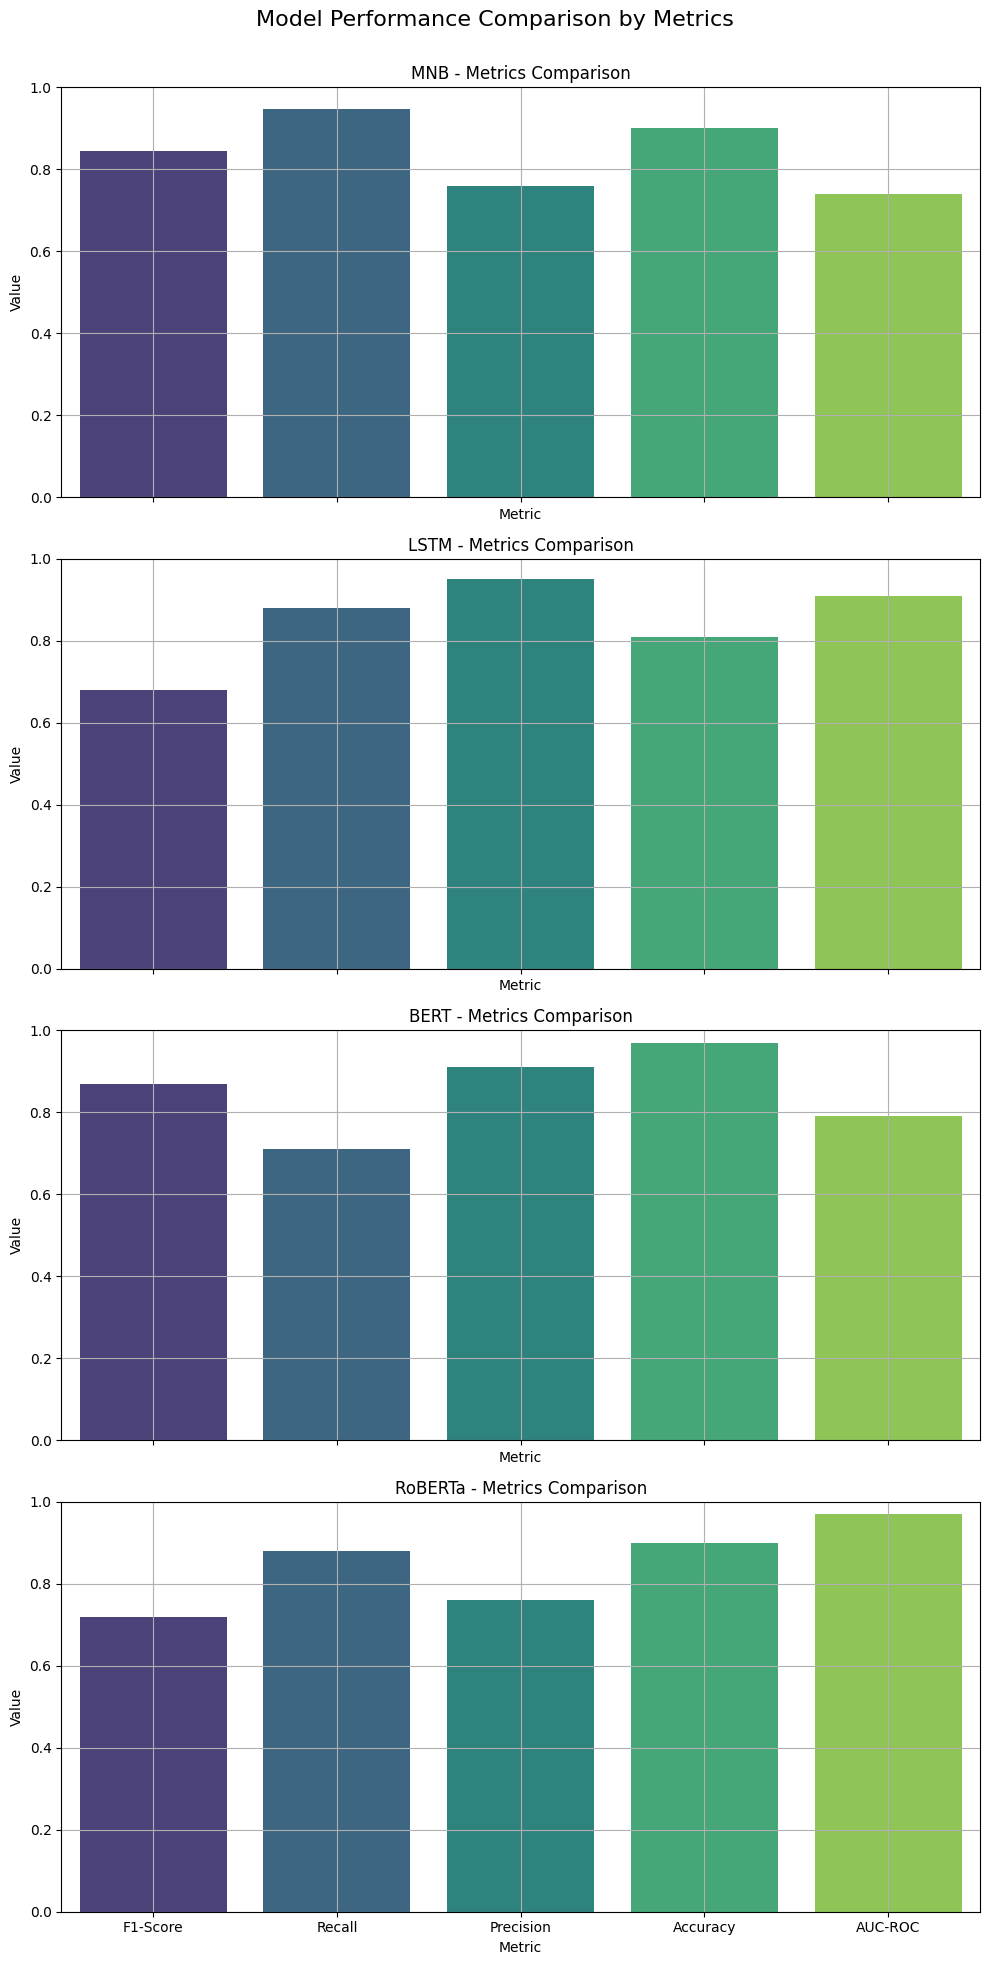

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns# Prepare data for all metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']
data_all = {
    'Model': ['MNB', 'LSTM', 'BERT', 'RoBERTa'] * len(metrics),
    'Metric': metrics * len(df),
    'Value': [df.loc[df['Model'] == model, metric].values[0] for model in df['Model'] for metric in metrics]
}

# Create a DataFrame
df_all = pd.DataFrame(data_all)

# Create a figure with subplots
num_models = len(df['Model'])
fig, axes = plt.subplots(num_models, 1, figsize=(10, 5 * num_models), sharex=True)

# Define a function to plot histograms
def plot_histogram_subplot(ax, df_all, model):
    subset = df_all[df_all['Model'] == model]
    sns.barplot(x='Metric', y='Value', data=subset, ax=ax, palette='viridis')
    ax.set_title(f'{model} - Metrics Comparison')
    ax.set_ylim(0, 1)
    ax.grid(True)

# Plot histograms for each model
for i, model in enumerate(df['Model']):
    plot_histogram_subplot(axes[i], df_all, model)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjusts for the figure title
plt.suptitle('Model Performance Comparison by Metrics', fontsize=16)
plt.show()


/tmp/ipykernel_33/1251054069.py:18: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



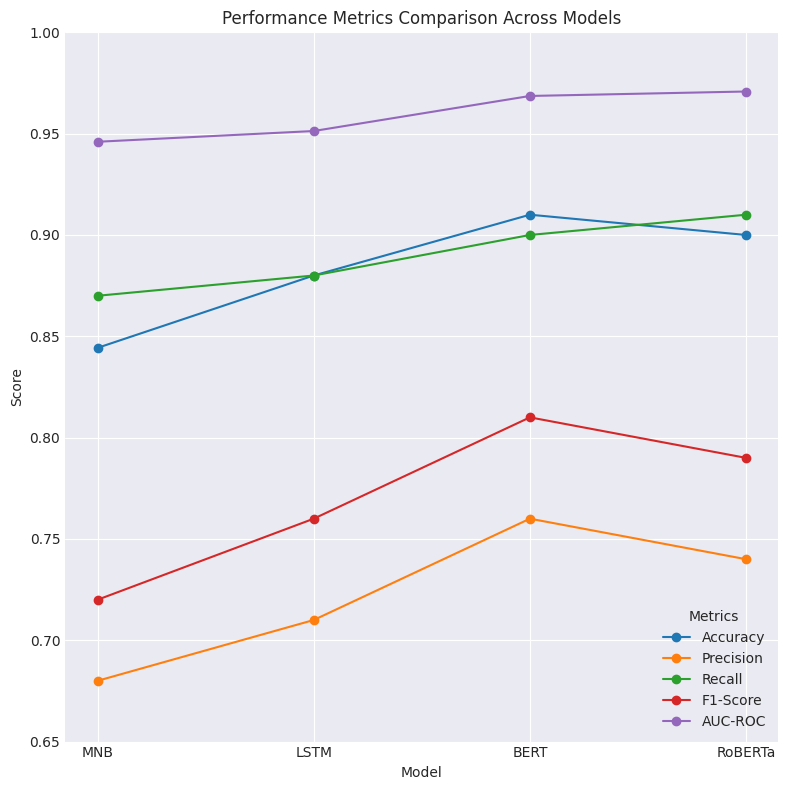

Plot saved to /kaggle/working/metrics_comparison.png


In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the updated data
data = {
    'Model': ['MNB', 'LSTM', 'BERT', 'RoBERTa'],
    'Accuracy': [0.8443, 0.88, 0.91, 0.90],
    'Precision': [0.68, 0.71, 0.76, 0.74],
    'Recall': [0.87, 0.88, 0.90, 0.91],
    'F1-Score': [0.72, 0.76, 0.81, 0.79],
    'AUC-ROC': [0.946, 0.9513, 0.9686, 0.9708]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Set the style
plt.style.use('seaborn-darkgrid')

# Create a line plot
plt.figure(figsize=(8, 8))

# Plot each metric
for metric in ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']:
    plt.plot(df['Model'], df[metric], marker='o', label=metric)

# Customize the plot
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Performance Metrics Comparison Across Models')
plt.legend(title='Metrics')
plt.ylim(0.65, 1)
plt.grid(True)

# Save the plot to the specified directory
plt.tight_layout()
save_path = '/kaggle/working/metrics_comparison.png'
plt.savefig(save_path)

# Show the plot
plt.show()

print(f"Plot saved to {save_path}")


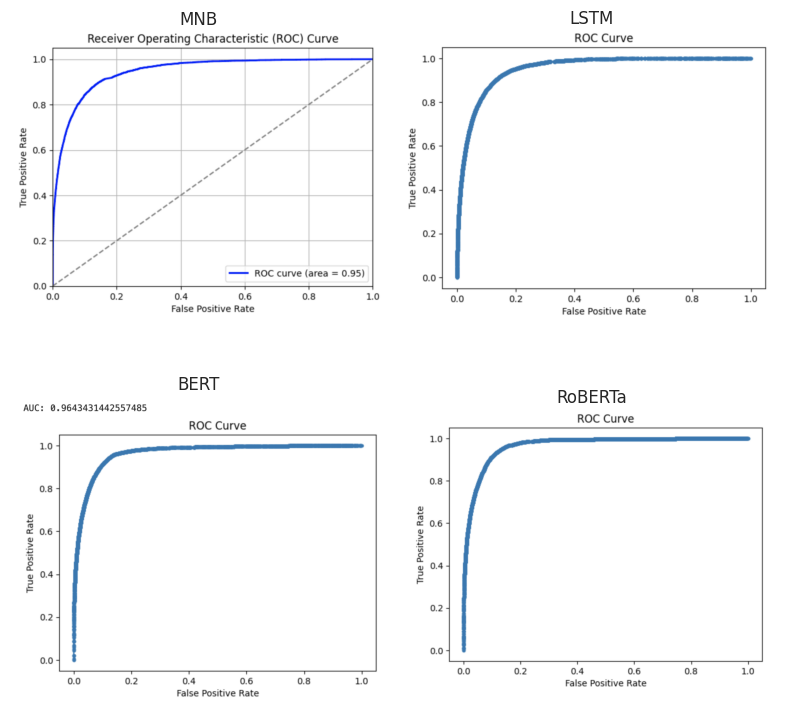

In [5]:
import matplotlib.pyplot as plt
from PIL import Image

# Load images
image1 = Image.open('/kaggle/input/comparisons-roc/mnb.png')
image2 = Image.open('/kaggle/input/comparisons-roc/Lstm.png')
image3 = Image.open('/kaggle/input/comparisons-roc/bert.png')
image4 = Image.open('/kaggle/input/comparisons-roc/Robert.png')

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

# Display images in subplots with captions
axs[0, 0].imshow(image1)
axs[0, 0].set_title('MNB')
axs[0, 0].axis('off')

axs[0, 1].imshow(image2)
axs[0, 1].set_title('LSTM')
axs[0, 1].axis('off')

axs[1, 0].imshow(image3)
axs[1, 0].set_title('BERT')
axs[1, 0].axis('off')

axs[1, 1].imshow(image4)
axs[1, 1].set_title('RoBERTa')
axs[1, 1].axis('off')

# Adjust layout
plt.tight_layout()

# Save the combined image
plt.savefig('combined_image_with_captions.png')

# Show the plot
plt.show()


Compact table image saved as 'table_image_compact.png'


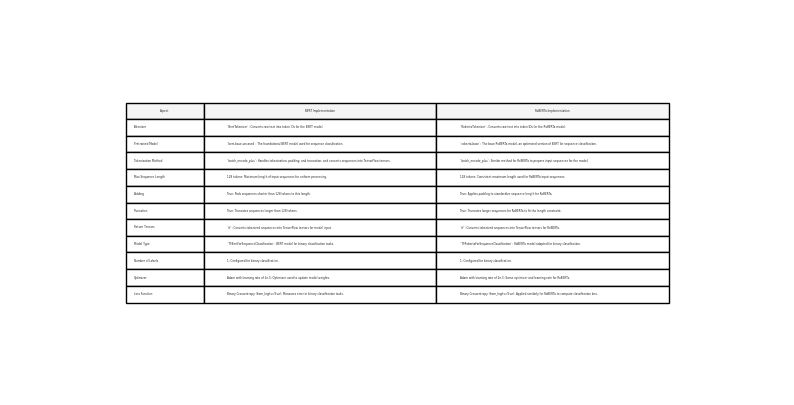

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the data for the table
data = {
    'Aspect': ['Tokenizer', 'Pretrained Model', 'Tokenization Method', 'Max Sequence Length', 'Padding', 'Truncation', 'Return Tensors', 'Model Type', 'Number of Labels', 'Optimizer', 'Loss Function'],
    'BERT Implementation': [
        '`BertTokenizer`: Converts raw text into token IDs for the BERT model.',
        '`bert-base-uncased`: The foundational BERT model used for sequence classification.',
        '`batch_encode_plus`: Handles tokenization, padding, and truncation, and converts sequences into TensorFlow tensors.',
        '128 tokens: Maximum length of input sequences for uniform processing.',
        'True: Pads sequences shorter than 128 tokens to this length.',
        'True: Truncates sequences longer than 128 tokens.',
        '`tf`: Converts tokenized sequences into TensorFlow tensors for model input.',
        '`TFBertForSequenceClassification`: BERT model for binary classification tasks.',
        '1: Configured for binary classification.',
        'Adam with learning rate of 2e-5: Optimizer used to update model weights.',
        'Binary Crossentropy (from_logits=True): Measures error in binary classification tasks.'
    ],
    'RoBERTa Implementation': [
        '`RobertaTokenizer`: Converts raw text into token IDs for the RoBERTa model.',
        '`roberta-base`: The base RoBERTa model, an optimized version of BERT for sequence classification.',
        '`batch_encode_plus`: Similar method for RoBERTa to prepare input sequences for the model.',
        '128 tokens: Consistent maximum length used for RoBERTa input sequences.',
        'True: Applies padding to standardize sequence length for RoBERTa.',
        'True: Truncates longer sequences for RoBERTa to fit the length constraint.',
        '`tf`: Converts tokenized sequences into TensorFlow tensors for RoBERTa.',
        '`TFRobertaForSequenceClassification`: RoBERTa model adapted for binary classification.',
        '1: Configured for binary classification.',
        'Adam with learning rate of 2e-5: Same optimizer and learning rate for RoBERTa.',
        'Binary Crossentropy (from_logits=True): Applied similarly for RoBERTa to compute classification loss.'
    ]
}

df = pd.DataFrame(data)

# Plot the table with compact columns
fig, ax = plt.subplots(figsize=(10, 5))  # Adjust size to make it more compact
ax.axis('tight')
ax.axis('off')

# Create a table with compact column widths
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='left', loc='center', colColours=['#f5f5f5']*3)

# Adjust column widths for compact appearance
for (i, j), cell in table._cells.items():
    if j == 0:  # First column (Aspect) - very narrow width
        cell.set_width(0.1)
    else:  # Other columns - wider
        cell.set_width(0.3)

# Save the table as an image with high DPI
plt.savefig('/kaggle/working/new_table_image_compact.png', bbox_inches='tight', pad_inches=0.1, dpi=300)

print("Compact table image saved as 'table_image_compact.png'")
